In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as s

np.random.seed(42)

In [2]:
data = pd.read_csv("train-bank-campaign-data.csv")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id_var
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,65790
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,55643
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,66189
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,70807
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,42625


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'id_var'],
      dtype='object')

In [5]:
data.shape

(37084, 22)

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
id_var              int64
dtype: object

In [7]:
stats = data.describe().T
stats['unique'] = [len(data[column].unique()) for column in stats.index]
stats['null'] = [data[column].isnull().sum() for column in stats.index]
stats['unknown'] = [(data[column] == "unknown").sum() for column in stats.index]
stats

,count,mean,std,min,25%,50%,75%,max,unique,null,unknown
age,37084.0,40.042714,10.432965,17.000,32.000,38.000,47.000,98.000,77,0,0
duration,37084.0,258.237946,258.730909,0.000,102.000,180.000,319.250,4918.000,1509,0,0
campaign,37084.0,2.569545,2.770611,1.000,1.000,2.000,3.000,56.000,42,0,0
pdays,37084.0,962.530849,186.773063,0.000,999.000,999.000,999.000,999.000,27,0,0
previous,37084.0,0.172986,0.495681,0.000,0.000,0.000,0.000,7.000,8,0,0
emp.var.rate,37084.0,0.082669,1.568997,-3.400,-1.800,1.100,1.400,1.400,10,0,0
cons.price.idx,37084.0,93.576076,0.578493,92.201,93.075,93.749,93.994,94.767,26,0,0
cons.conf.idx,37084.0,-40.505183,4.622045,-50.800,-42.700,-41.800,-36.400,-26.900,26,0,0
euribor3m,37084.0,3.621668,1.733972,0.634,1.344,4.857,4.961,5.045,314,0,0
nr.employed,37084.0,5167.058664,72.196605,4963.600,5099.100,5191.000,5228.100,5228.100,11,0,0


In [8]:
data['pdays'].value_counts()

999    35722
3        398
6        361
4        105
9         57
2         56
12        54
7         51
10        46
5         43
13        34
11        28
1         25
14        20
15        19
8         18
0         12
16        11
17         8
18         4
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [9]:
cat_stats = data.describe(include=['object']).T
cat_stats['null'] = [data[column].isnull().sum() for column in cat_stats.index]
cat_stats['unknown'] = [(data[column] == "unknown").sum() for column in cat_stats.index]
cat_stats

,count,unique,top,freq,null,unknown
job,37084,12,admin.,9420,0,306
marital,37084,4,married,22479,0,72
education,37084,8,university.degree,10971,0,1549
default,37084,3,no,29382,0,7700
housing,37084,3,yes,19433,0,882
loan,37084,3,no,30561,0,882
contact,37084,2,cellular,23522,0,0
month,37084,10,may,12420,0,0
day_of_week,37084,5,thu,7778,0,0
poutcome,37084,3,nonexistent,32023,0,0


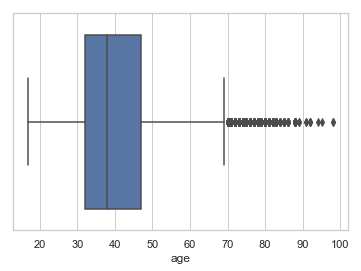

In [10]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data['age'])

In [11]:
def numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(s.zscore(x)) < z_thresh, reduce=False).all(axis=1)
    # Drop (inplace) values set to be rejected
    return constrains

In [12]:
outliers = pd.DataFrame(numerical_outliers(data), columns = ['outlier'])
outliers['outlier'].value_counts()

True     33580
False     3504
Name: outlier, dtype: int64

In [13]:
data['y'].value_counts()

no     32876
yes     4208
Name: y, dtype: int64

What does all this information tell us?

1) There is not null values

2) We can see which columns don't contain useful information for our predictions:

*The id_var column contains a unique identifier for each row and will not be useful for prediction

*The duration column is the last contact duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

3) The column y is categorical, so we have to transform it to numerical.

4) The column pvalue has a value 999 when the client was not previously contacted, but it's very different from the rest of the values. We don't want to treat as outlier since there is a lot of rows with this value. In this case we decide to drop this column, since could confuse the ML algorithms.

5) There are some outliers. We have to remove them.

6) The dependent variable is unbalance, so we have to balance it.

7) We should analyze the correlation of numerical features and delete the columns highly correlated.

8) Transform categorical features to numerical using one-hot encode (get_dummmies)

In [14]:
df =  data.copy()

In [15]:
df.drop(columns = ['id_var', 'duration', 'pdays'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(s.zscore(x)) < z_thresh, reduce=False).all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [18]:
drop_numerical_outliers(df)
df.shape

(35055, 19)

In [19]:
df['y'].value_counts()

no     31487
yes     3568
Name: y, dtype: int64

In [20]:
# Label Encoding
df['target'] = np.where(df['y'] == "yes", 1, 0)
df.drop(columns = 'y', inplace = True)

In [21]:
features = df[[col for col in df if col not in ['target']]].reset_index(drop = True)
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [22]:
features.shape

(35055, 18)

In [23]:
target = df[['target']]

In [24]:
target.shape

(35055, 1)

In [25]:
corr_matrix = features.corr().abs()
corr_matrix

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.005837,0.015648,0.058357,0.031133,0.114189,0.072240,0.054894
campaign,0.005837,1.000000,0.069311,0.117604,0.089787,0.009271,0.099029,0.112763
previous,0.015648,0.069311,1.000000,0.430963,0.333432,0.144518,0.432611,0.413975
emp.var.rate,0.058357,0.117604,0.430963,1.000000,0.798093,0.258894,0.974323,0.919434
cons.price.idx,0.031133,0.089787,0.333432,0.798093,1.000000,0.116612,0.727246,0.585527
cons.conf.idx,0.114189,0.009271,0.144518,0.258894,0.116612,1.000000,0.336733,0.152616
euribor3m,0.072240,0.099029,0.432611,0.974323,0.727246,0.336733,1.000000,0.948050
nr.employed,0.054894,0.112763,0.413975,0.919434,0.585527,0.152616,0.948050,1.000000


[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'campaign'),
 Text(2.5, 0, 'previous'),
 Text(3.5, 0, 'emp.var.rate'),
 Text(4.5, 0, 'cons.price.idx'),
 Text(5.5, 0, 'cons.conf.idx'),
 Text(6.5, 0, 'euribor3m'),
 Text(7.5, 0, 'nr.employed')]

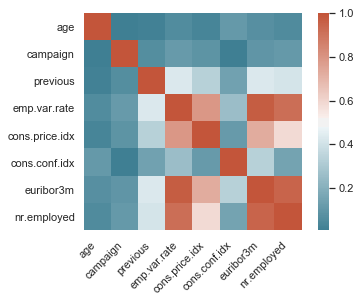

In [26]:
ax = sns.heatmap(
    corr_matrix, #data

    cmap = sns.diverging_palette(
        220, # Anchor hue (negative)
        20, # Anchor hue (positive)
        n = 360 #Number of colors in the palette (optional)
    ),
    square = True,
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

In [27]:
tri = np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)
upper = corr_matrix.where(tri)
# Find index of feature columns with correlation greater than 90%
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
to_drop

['euribor3m', 'nr.employed']

In [28]:
# Drop highly colinear features
features.drop(features[to_drop], axis = 1, inplace = True)
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4


In [29]:
features.shape

(35055, 16)

In [30]:
cat_data = df.select_dtypes(include=['object']).copy()

In [31]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [32]:
cat_data_dummies = pd.get_dummies(df[cat_data.columns])
cat_data_dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
cat_data_dummies.shape

(35055, 53)

In [34]:
df1 = features.copy()
df1.drop(columns = cat_data.columns, inplace = True)
df1.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,1,0,1.1,93.994,-36.4
1,45,1,0,1.1,93.994,-36.4
2,59,1,0,1.1,93.994,-36.4
3,41,1,0,1.1,93.994,-36.4
4,24,1,0,1.1,93.994,-36.4


In [35]:
df1.shape

(35055, 6)

In [36]:
cat_data_dummies.shape

(35055, 53)

In [41]:
features = pd.concat([cat_data_dummies, df1])
# features = pd.concat([df1, cat_data_dummies], axis=1).reset_index(drop=True)

In [44]:
features = cat_data_dummies.merge(df1, on=df1.index)

In [52]:
features.shape

(35055, 59)

In [50]:
features.drop(columns = 'key_0', inplace = True)

In [51]:
features.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,56,1,0,1.1,93.994,-36.4
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,45,1,0,1.1,93.994,-36.4
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,59,1,0,1.1,93.994,-36.4
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,41,1,0,1.1,93.994,-36.4
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,24,1,0,1.1,93.994,-36.4


In [53]:
target.shape

(35055, 1)

In [54]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    features,
    target,
    test_size = .2,
    random_state = 42
)

train_X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx
8403,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,33,1,0,1.4,94.465,-41.8
27389,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,44,1,0,-1.8,92.893,-46.2
15291,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,48,3,0,1.4,93.918,-42.7
3023,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,26,1,0,1.1,93.994,-36.4
32113,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,55,3,1,-2.9,92.963,-40.8


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier


classifiers = {'Logistic Regression': LogisticRegression(solver = 'lbfgs'),
              'Gaussian NB': GaussianNB(),
              'Bernoulli NB': BernoulliNB(),
              'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
              'KNeighborsClassifier': KNeighborsClassifier(), 
              'Linear SVC': LinearSVC(),
              'Neural Network':  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)}
              
def compare_models(x, y, model_dict, folds=3):
    results = []
    for name, model in model_dict.items():
        scores = cross_val_score(model, x, y, cv=folds)
        stats = [name, scores.mean(), min(scores), max(scores), scores.std(), pd.Series(scores).mad(), scores]
        results.append(stats)
    df = pd.DataFrame(results, columns = ['Model', 'Mean', 'Min', 'Max','Std', 'Mad', 'Score'])
    df = df.sort_values('Mean', ascending = False)
    return df

In [56]:
compare_models(features, target, classifiers, folds=5)

,Model,Mean,Min,Max,Std,Mad,Score
6,Neural Network,0.898217,0.898160,0.898288,0.000058,0.000057,"[0.8981745579007416, 0.8981745579007416, 0.898..."
3,Random Forest,0.823438,0.649073,0.898175,0.099640,0.089678,"[0.8981745579007416, 0.8981745579007416, 0.898..."
5,Linear SVC,0.722725,0.188873,0.898175,0.274735,0.213541,"[0.8981745579007416, 0.8981745579007416, 0.898..."
2,Bernoulli NB,0.676251,0.269472,0.909013,0.244321,0.219974,"[0.8981745579007416, 0.9090131203650884, 0.771..."
0,Logistic Regression,0.618959,0.191155,0.898460,0.342182,0.335224,"[0.8981745579007416, 0.8984597832287508, 0.898..."
4,KNeighborsClassifier,0.615216,0.410842,0.898175,0.211886,0.203596,"[0.8981745579007416, 0.5136908157444381, 0.841..."
1,Gaussian NB,0.553660,0.234522,0.894039,0.237527,0.206221,"[0.8940387906446092, 0.3572447233314318, 0.713..."


The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

We find the z score for each of the data point in the dataset and if the z score is greater than 3 than we can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively,that data point will be identified as outliers.